In [31]:
import pandas as pd
import numpy as np
from pdb import set_trace
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import os
from collections import defaultdict

algos = ['AdaBoost','GradientBoost','RandomForest']
valuation = ['mean','dollar_neutral_refreshed','market_cap']
interpolation = ['linear','trend']
filterStocks = ['no_rule','probability']
tr_cost = [True,False]

def feature_imp_dict(df, input_dict):
    for date in df.index:
        tmp_top_10_features = df.loc[date].sort_values(ascending=False).head(10).keys()
        for tmp_feature in tmp_top_10_features:
            input_dict[tmp_feature]=input_dict[tmp_feature]+1

    sorted_input_dict = {k: v for k, v in sorted(input_dict.items(), key=lambda item: item[1])}
    for key in sorted_input_dict.keys():
        sorted_input_dict[key] = 100*sorted_input_dict[key]/df.index.shape[0]
    return sorted_input_dict

def feature_imp_plots(df_adaboost, df_gradientboost, df_randomforest, interp):

    color_scheme = {'AdaBoost': 'red','GradientBoost': 'green', 'RandomForest': 'blue'}
    feature_names = ['bm', 'pe_exi', 'pe_op_dil', 'evm', 'debt_at', 'de_ratio', 'liquidity',
       'roe', 'roa', 'roce', 'DIVYIELD', 'dpr', 'intcov_ratio', 'debt_ebitda',
       'rect_turn', 'pay_turn', 'at_turn', 'inv_turn', 'cash_ratio',
       'quick_ratio', 'curr_ratio', 'cash_conversion', '1M_vol', '3M_vol',
       '3M_mom', '12M_mom', 'b_mkt', 'b_smb', 'b_hml', 'b_umd']
    df_adaboost.columns = feature_names
    df_gradientboost.columns = feature_names
    df_randomforest.columns = feature_names
    initial_dict_adaboost = dict.fromkeys(feature_names, 0)
    initial_dict_gradientboost = dict.fromkeys(feature_names, 0)
    initial_dict_randomforest = dict.fromkeys(feature_names, 0)
    adaboost_dict = feature_imp_dict(df_adaboost,initial_dict_adaboost)
    gradientboost_dict = feature_imp_dict(df_gradientboost,initial_dict_gradientboost)
    randomforest_dict = feature_imp_dict(df_randomforest,initial_dict_randomforest)

    fig, axs = plt.subplots(3, 1,figsize=(10,15))
    axs[0].bar(randomforest_dict.keys(),randomforest_dict.values(), color  = 'red')
    axs[0].set_title('Random Forest')
    axs[1].bar(adaboost_dict.keys(),adaboost_dict.values(), color  = 'green')
    axs[1].set_title('AdaBoost')
    axs[2].bar(gradientboost_dict.keys(),gradientboost_dict.values(), color  = 'blue')
    axs[2].set_title('GradientBoost')

    for ax in axs.flat:
        ax.tick_params(labelrotation=90)
        ax.set(xlabel='Features', ylabel='Feature Importance %')
    
    fig.tight_layout()
    
    fig.savefig(interp+' Feature Importance.png')

    return adaboost_dict,gradientboost_dict,randomforest_dict

In [26]:
def timeseriesplot(df1,df2,df3,features1,features2,features3):
    tmpdf1 = df1[features1]
    tmpdf2 = df2[features2]
    tmpdf3 = df3[features3]
    fig, axs = plt.subplots(3, 1,figsize=(10,20))
    axs[0].plot(pd.to_datetime(tmpdf1.index), tmpdf1)
    axs[0].legend(tmpdf1.columns,fontsize = 10)
    axs[0].set_title('AdaBoost')
    axs[1].plot(pd.to_datetime(tmpdf2.index),tmpdf2)
    axs[1].legend(tmpdf2.columns, fontsize = 10)
    axs[1].set_title('GradientBoost')
    axs[2].plot(pd.to_datetime(tmpdf3.index),tmpdf3)
    axs[2].legend(tmpdf3.columns, fontsize = 10)
    axs[2].set_title('Random Forest')
    
    for ax in axs.flat:
        ax.tick_params('x',width = 6,labelrotation=90)
        ax.set(xlabel='Date', ylabel='Feature Importance')

    fig.tight_layout()
    fig.savefig('Time series of Feature Importance.png')
    return

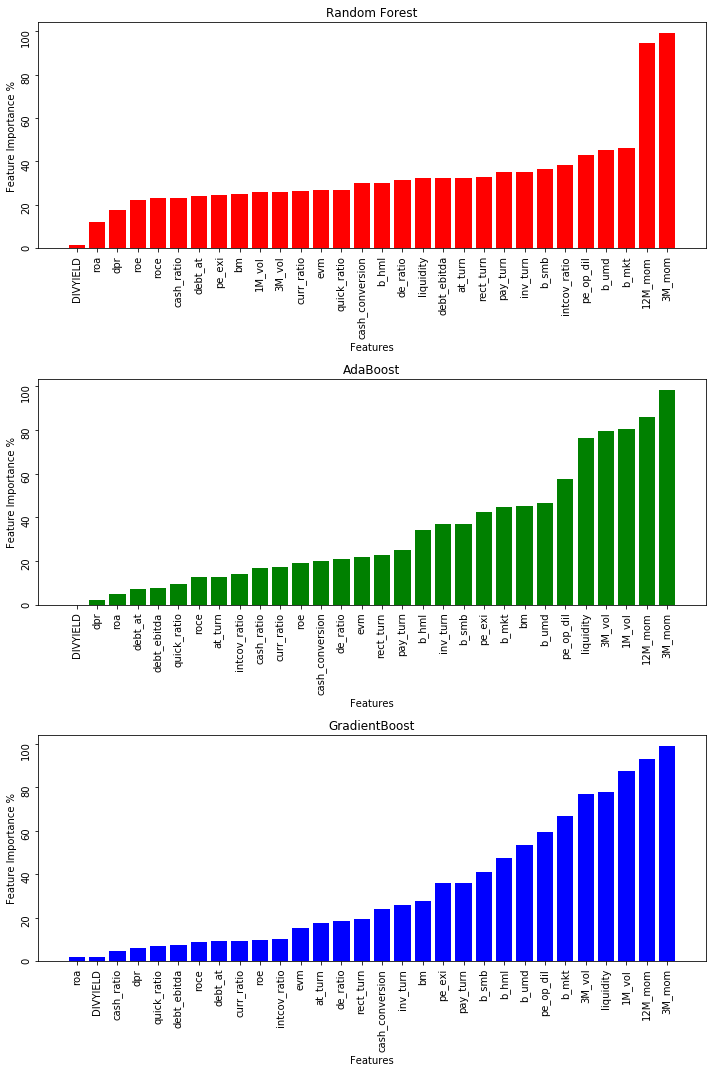

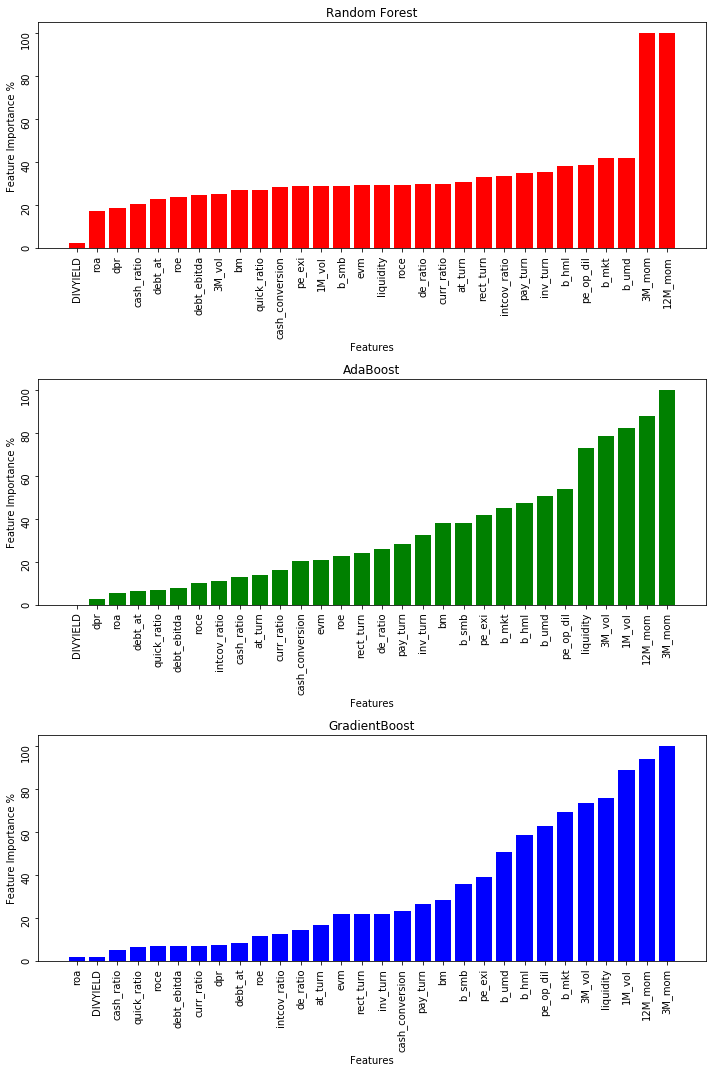

In [34]:
for interp in interpolation:
    for algo in algos:
        try:
            test_file_name = './Results/Lagged/'+algo+'_market_cap_no_rule_'+interp+'_feature_importance_lagged.csv'
            test = pd.read_csv(test_file_name, index_col=0)
        except:
            test_file_name = './Results/Lagged/'+algo + '_market_cap_no_rule_True_' + interp + '_feature_importance_lagged.csv'
            test = pd.read_csv(test_file_name, index_col=0)
        if algo == 'AdaBoost':
            adaboost_df = pd.read_csv(test_file_name, index_col=0)
        elif algo == 'GradientBoost':
            gradientboost_df = pd.read_csv(test_file_name, index_col=0)
        elif algo == 'RandomForest':
            randomforest_df = pd.read_csv(test_file_name, index_col=0)
    dict1, dict2, dict3 = feature_imp_plots(adaboost_df,gradientboost_df,randomforest_df,interp)

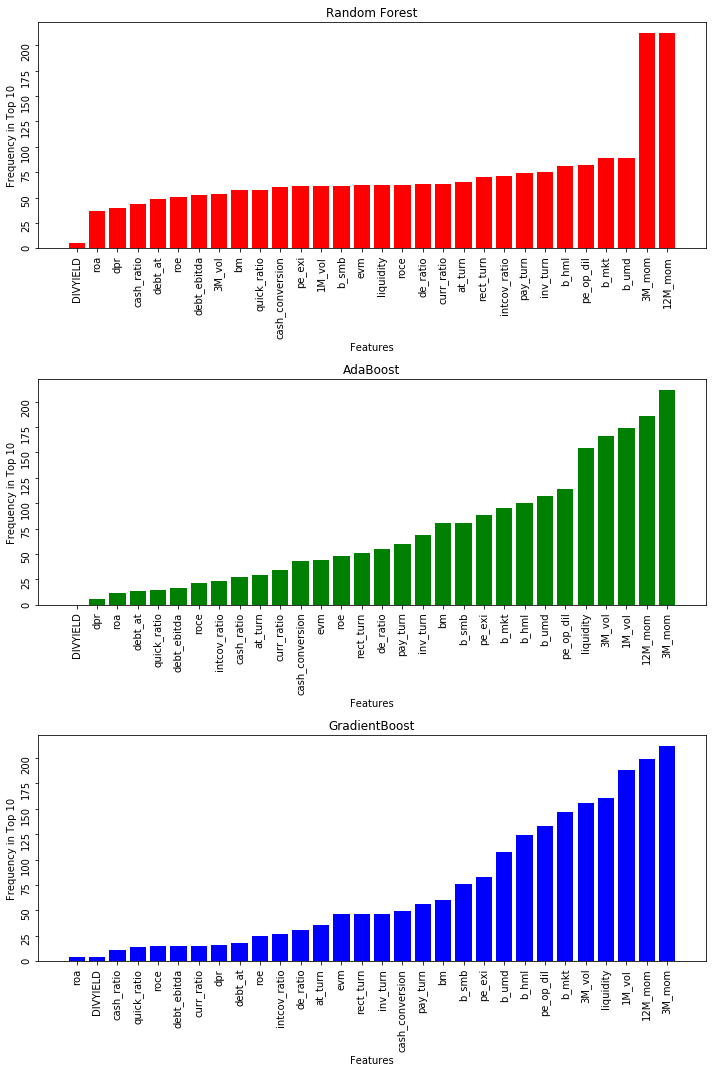

In [69]:
for interp in ['Trend']:
    for algo in algos:
        try:
            test_file_name = './Results/Lagged/'+algo+'_market_cap_no_rule_True_'+interp+'_feature_importance_lagged.csv'
        except:
            test_file_name = './Results/Lagged/'+algo + '_market_cap_no_rule_' + interp + '_feature_importance_lagged.csv'
        if algo == 'AdaBoost':
            adaboost_df = pd.read_csv(test_file_name, index_col=0)
        elif algo == 'GradientBoost':
            gradientboost_df = pd.read_csv(test_file_name, index_col=0)
        elif algo == 'RandomForest':
            randomforest_df = pd.read_csv(test_file_name, index_col=0)
    dict1, dict2, dict3 = feature_imp_plots(adaboost_df,gradientboost_df,randomforest_df,interp)

In [113]:
adaboost_df

,bm,pe_exi,pe_op_dil,evm,debt_at,de_ratio,liquidity,roe,roa,roce,...,curr_ratio,cash_conversion,1M_vol,3M_vol,3M_mom,12M_mom,b_mkt,b_smb,b_hml,b_umd
2001-01-31,0.040,0.025,0.015,0.025,0.020,0.015,0.065,0.015,0.030,0.050,...,0.005,0.035,0.035,0.050,0.145,0.040,0.035,0.030,0.035,0.035
2001-02-28,0.035,0.055,0.040,0.010,0.005,0.005,0.045,0.045,0.025,0.050,...,0.020,0.030,0.040,0.055,0.105,0.035,0.035,0.035,0.045,0.045
2001-03-31,0.030,0.040,0.020,0.025,0.020,0.030,0.050,0.035,0.020,0.045,...,0.040,0.025,0.050,0.055,0.115,0.015,0.025,0.030,0.030,0.060
2001-04-30,0.050,0.040,0.020,0.020,0.030,0.040,0.055,0.010,0.030,0.025,...,0.035,0.030,0.045,0.035,0.100,0.020,0.030,0.025,0.035,0.030
2001-05-31,0.055,0.035,0.025,0.040,0.015,0.045,0.040,0.020,0.015,0.040,...,0.035,0.025,0.060,0.045,0.105,0.040,0.025,0.025,0.035,0.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-30,0.030,0.025,0.040,0.020,0.030,0.015,0.040,0.020,0.010,0.025,...,0.020,0.015,0.045,0.060,0.160,0.070,0.040,0.015,0.050,0.035
2018-05-31,0.020,0.040,0.045,0.015,0.035,0.025,0.055,0.015,0.020,0.025,...,0.010,0.010,0.045,0.060,0.140,0.060,0.040,0.025,0.040,0.065
2018-06-30,0.030,0.035,0.035,0.025,0.035,0.020,0.060,0.025,0.015,0.020,...,0.005,0.025,0.040,0.070,0.125,0.065,0.025,0.015,0.035,0.030
2018-07-31,0.030,0.020,0.040,0.020,0.030,0.015,0.045,0.025,0.025,0.030,...,0.025,0.040,0.020,0.045,0.130,0.065,0.040,0.040,0.030,0.030


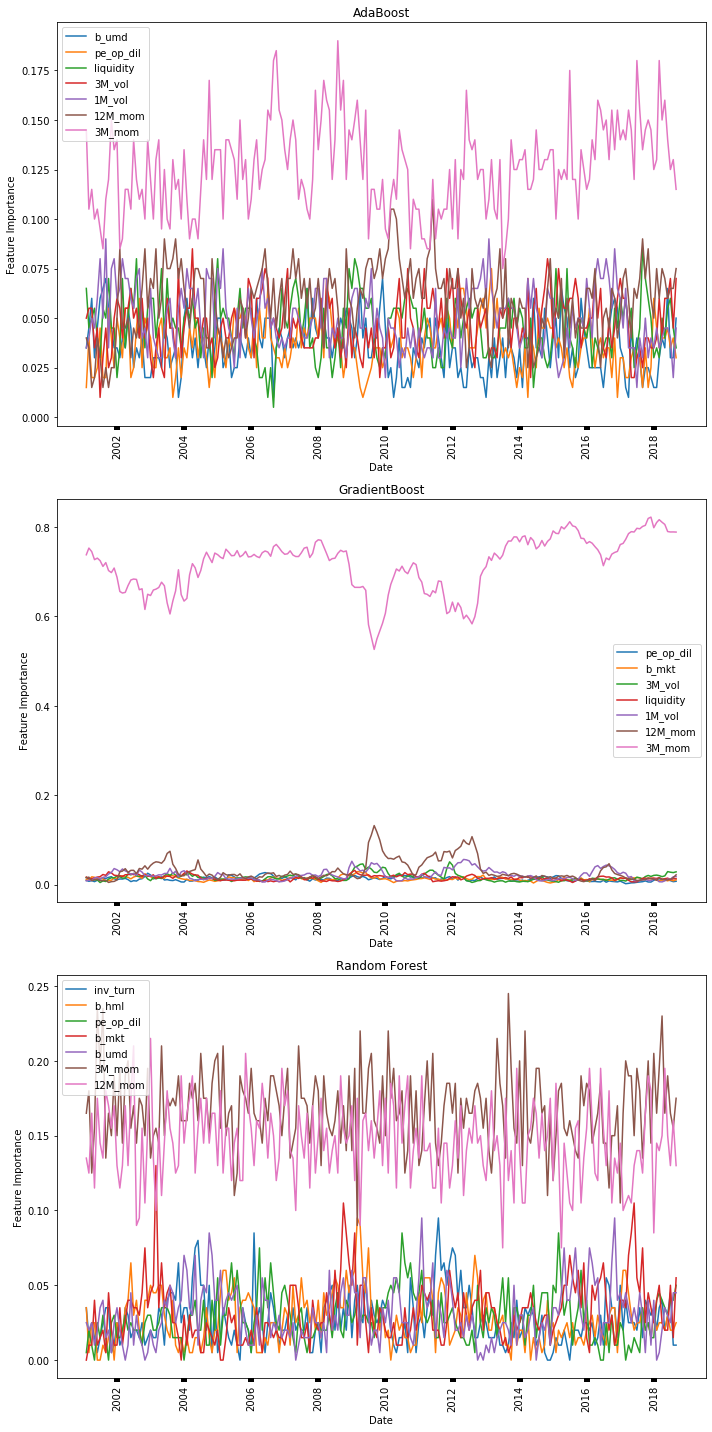

In [119]:
adaboost_top10 = list(dict1.keys())[-7:]
gradientboost_top10 = list(dict2.keys())[-7:]
randomforest_top10 = list(dict3.keys())[-7:]
timeseriesplot(adaboost_df,gradientboost_df,randomforest_df,adaboost_top10,gradientboost_top10,randomforest_top10)

In [112]:
test_file_name

'./Results/Lagged/RandomForest_market_cap_no_rule_True_Trend_feature_importance_lagged.csv'

In [183]:
try:
    f1 = './Results/Unlagged/AdaBoost_market_cap_no_rule_Trend_feature_importance.csv'
    test_df = pd.read_csv(f1,index_col=0)
except:
    f1 = './Results/Unlagged/AdaBoost_market_cap_no_rule__True_Trend_feature_importance.csv'
    test_df = pd.read_csv(f1, index_col=0)
    
f2 = './Results/Unlagged/GradientBoost_market_cap_no_rule_Trend_feature_importance.csv'  
f3 = './Results/Unlagged/RandomForest_market_cap_no_rule_Trend_feature_importance.csv' 
f4 = './Results/Unlagged/AdaBoost_market_cap_no_rule_Trend_feature_importance.csv' 
f5 = './Results/Unlagged/GradientBoost_market_cap_no_rule_Trend_feature_importance.csv' 
f6 = './Results/Unlagged/RandomForest_market_cap_no_rule_Trend_feature_importance.csv' 
 
    
files = [f1,f2,f3,f4,f5,f6]
for file in files:
    print(file)
    test_series = pd.read_csv(file, index_col = 0)['Long_Only']
    input_series = np.cumprod(1 + test_series.values)
    input_series = np.append([1.0],input_series)
    
    
    
    

In [229]:
def maximum_drawdown(input_series):
    input_series = np.cumprod(1 + input_series.values)
    input_series = np.append([1.0],input_series)
    xs = input_series
    i = np.argmax(np.maximum.accumulate(xs) - xs) # end of the period
    j = np.argmax(xs[:i]) # start of period
    plt.plot(xs)
    plt.plot([i, j], [xs[i], xs[j]], 'o', color='Red', markersize=10)
    plt.show()
    return (xs[i]-xs[j])

In [22]:
def max_drawdown(series):
    input_series = np.cumprod(1 + series.values)
    input_series = np.append([1.0],input_series)
    min_now, max_now = input_series[0], input_series[0]
    start_period, end_period = pd.to_datetime('2000-12-31').date(), pd.to_datetime('2000-12-31').date()
    max_period, min_period = pd.to_datetime('2000-12-31').date(), pd.to_datetime('2000-12-31').date()
    drawdown = 0
    for i in range(1,len(input_series)):
        if input_series[i] > max_now:
            max_now = input_series[i]
            min_now = input_series[i]
            max_period = series.index[i-1]
        elif input_series[i] < min_now:
            min_now = input_series[i]
            min_period = series.index[i-1]
            if float((max_now-min_now)/max_now) > drawdown:
                drawdown = float((max_now-min_now)/max_now)
                start_period = max_period
                end_period = min_period
            #print(start_period, test_series.index[i-1], float(drawdown/max_now))
            #print(start_period, end_period, float(drawdown))
    print(start_period, end_period, float(drawdown))

./Results/Unlagged/AdaBoost_mean_no_rule_True_linear_returns.csv


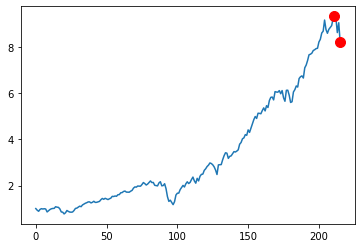

-0.12037496539334332
./Results/Unlagged/AdaBoost_mean_probability_True_linear_returns.csv


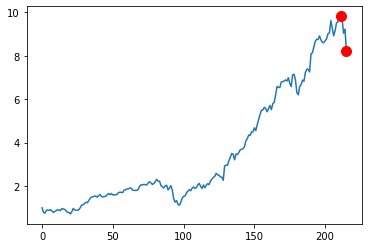

-0.16270778932965224
./Results/Unlagged/GradientBoost_mean_no_rule_True_linear_returns.csv


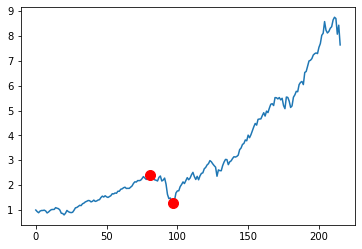

-0.4712318374845465
./Results/Unlagged/GradientBoost_mean_probability_True_linear_returns.csv


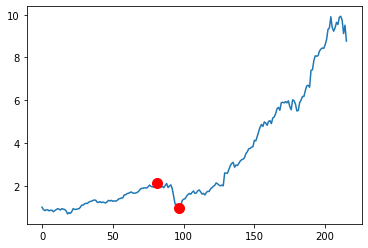

-0.5490642726086281
./Results/Unlagged/RandomForest_mean_no_rule_True_linear_returns.csv


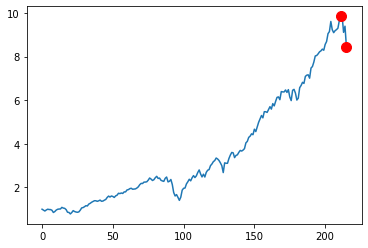

-0.14167746285199093
./Results/Unlagged/RandomForest_mean_probability_True_linear_returns.csv


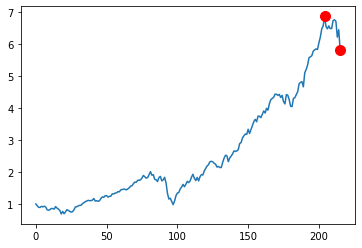

-0.1553596240994074
./Results/Unlagged/AdaBoost_dollar_neutral_refreshed_no_rule_True_linear_returns.csv


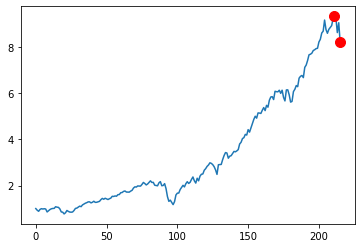

-0.12037496488854725
./Results/Unlagged/AdaBoost_dollar_neutral_refreshed_probability_True_linear_returns.csv


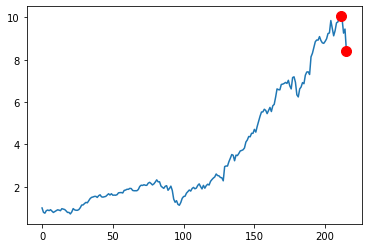

-0.16270778932965202
./Results/Unlagged/GradientBoost_dollar_neutral_refreshed_no_rule_True_linear_returns.csv


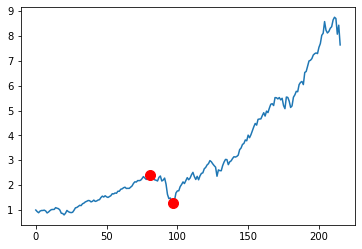

-0.4712318374845465
./Results/Unlagged/GradientBoost_dollar_neutral_refreshed_probability_True_linear_returns.csv


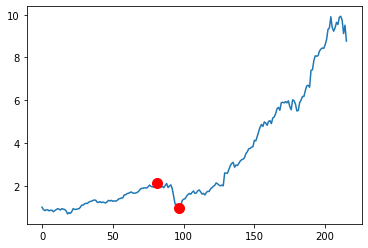

-0.5490642726086281
./Results/Unlagged/RandomForest_dollar_neutral_refreshed_no_rule_True_linear_returns.csv


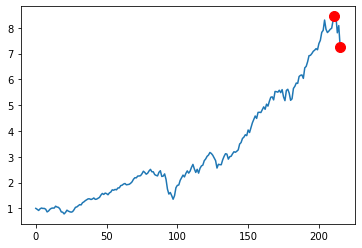

-0.14018860616042436
./Results/Unlagged/RandomForest_dollar_neutral_refreshed_probability_True_linear_returns.csv


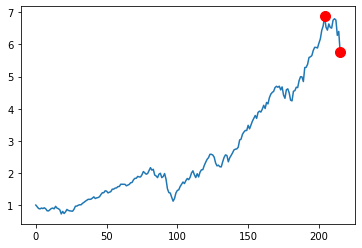

-0.1638889943737099
./Results/Unlagged/AdaBoost_market_cap_no_rule_True_linear_returns.csv


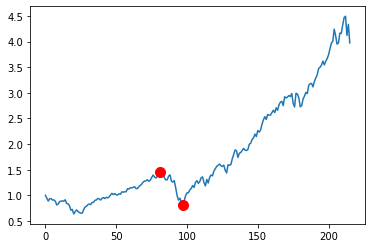

-0.44517431731702695
./Results/Unlagged/AdaBoost_market_cap_probability_True_linear_returns.csv


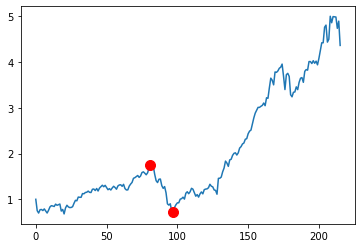

-0.5824102463903214
./Results/Unlagged/GradientBoost_market_cap_no_rule_True_linear_returns.csv


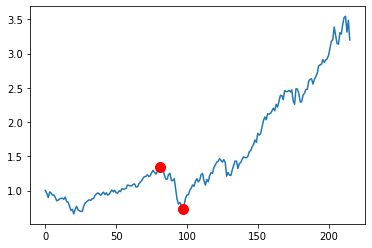

-0.4578574788716879
./Results/Unlagged/GradientBoost_market_cap_probability_True_linear_returns.csv


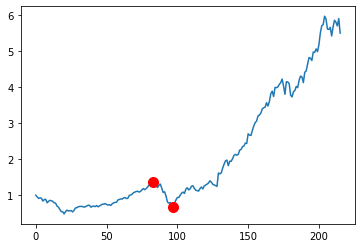

-0.498735012923924
./Results/Unlagged/RandomForest_market_cap_no_rule_True_linear_returns.csv


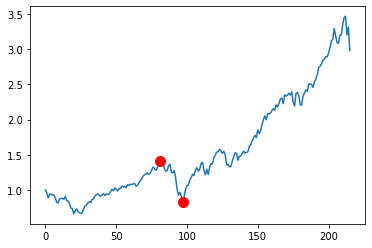

-0.41325268636700324
./Results/Unlagged/RandomForest_market_cap_probability_True_linear_returns.csv


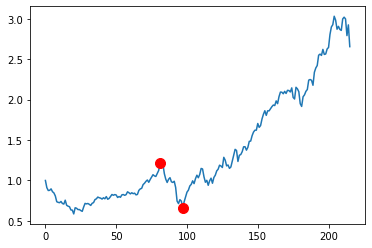

-0.45359639892042564
./Results/Unlagged/AdaBoost_mean_no_rule_True_trend_returns.csv


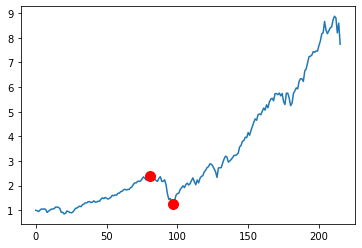

-0.48518886318969234
./Results/Unlagged/AdaBoost_mean_probability_True_trend_returns.csv


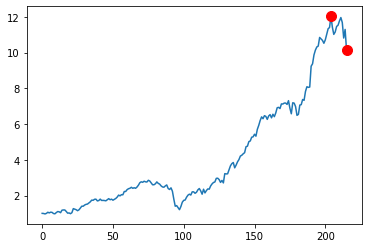

-0.15701349436242634
./Results/Unlagged/GradientBoost_mean_no_rule_True_trend_returns.csv


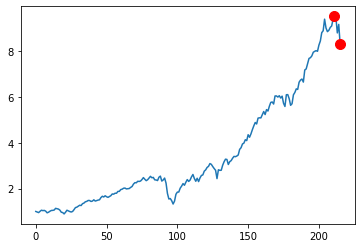

-0.12868416010206019
./Results/Unlagged/GradientBoost_mean_probability_True_trend_returns.csv


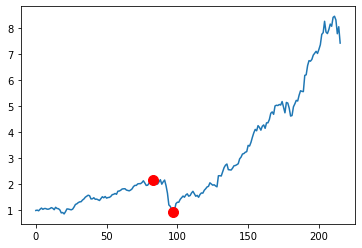

-0.5762615623039672
./Results/Unlagged/RandomForest_mean_no_rule_True_trend_returns.csv


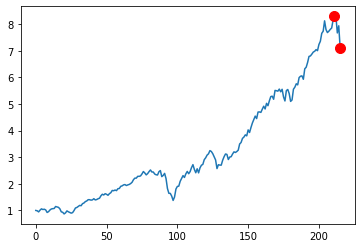

-0.14323901508998302
./Results/Unlagged/RandomForest_mean_probability_True_trend_returns.csv


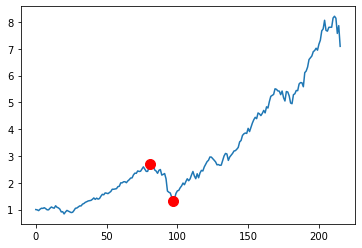

-0.5153116533286286
./Results/Unlagged/AdaBoost_dollar_neutral_refreshed_no_rule_True_trend_returns.csv


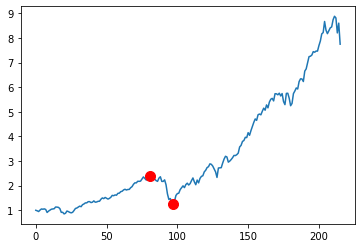

-0.48518886318969245
./Results/Unlagged/AdaBoost_dollar_neutral_refreshed_probability_True_trend_returns.csv


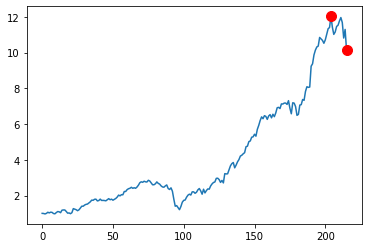

-0.15701349436242634
./Results/Unlagged/GradientBoost_dollar_neutral_refreshed_no_rule_True_trend_returns.csv


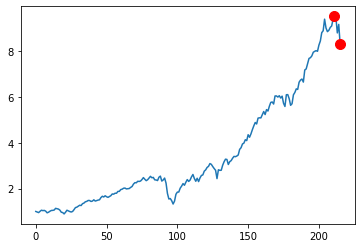

-0.12868416010206032
./Results/Unlagged/GradientBoost_dollar_neutral_refreshed_probability_True_trend_returns.csv


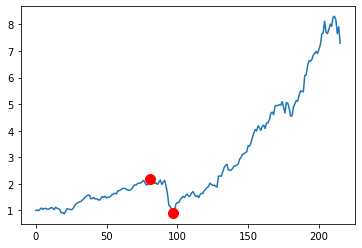

-0.5799877946923283
./Results/Unlagged/RandomForest_dollar_neutral_refreshed_no_rule_True_trend_returns.csv


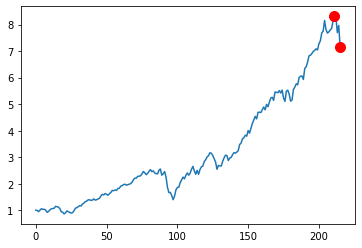

-0.1409783329205468
./Results/Unlagged/RandomForest_dollar_neutral_refreshed_probability_True_trend_returns.csv


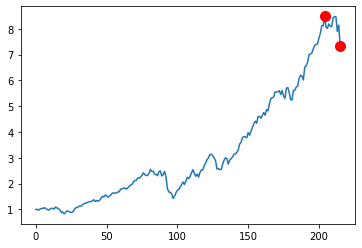

-0.13534490477465755
./Results/Unlagged/AdaBoost_market_cap_no_rule_True_trend_returns.csv


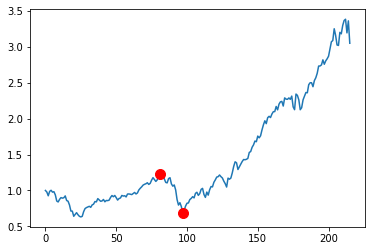

-0.44528763444074315
./Results/Unlagged/AdaBoost_market_cap_probability_True_trend_returns.csv


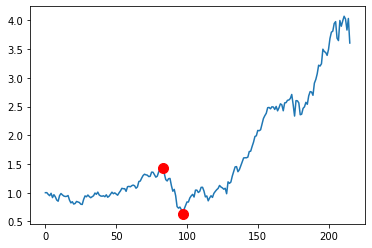

-0.5564691810228118
./Results/Unlagged/GradientBoost_market_cap_no_rule_True_trend_returns.csv


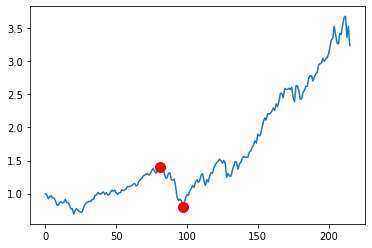

-0.42698406726559057
./Results/Unlagged/GradientBoost_market_cap_probability_True_trend_returns.csv


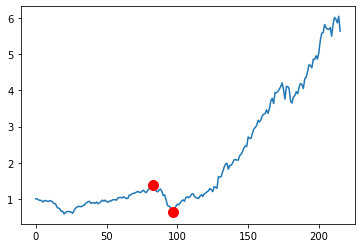

-0.539129705559955
./Results/Unlagged/RandomForest_market_cap_no_rule_True_trend_returns.csv


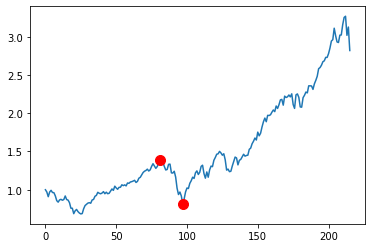

-0.4113144867053601
./Results/Unlagged/RandomForest_market_cap_probability_True_trend_returns.csv


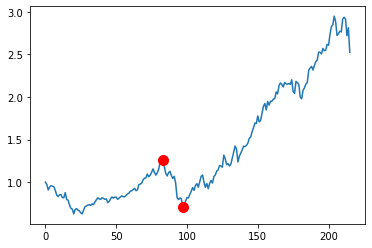

-0.4377971038890699
./Results/Unlagged/AdaBoost_mean_no_rule_linear_returns.csv


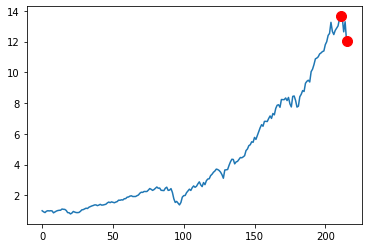

-0.11645610297283569
./Results/Unlagged/AdaBoost_mean_probability_linear_returns.csv


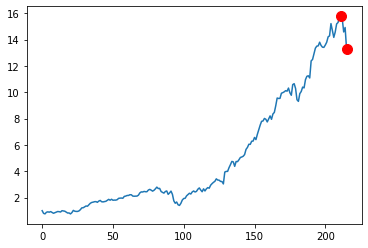

-0.1554077395411753
./Results/Unlagged/GradientBoost_mean_no_rule_linear_returns.csv


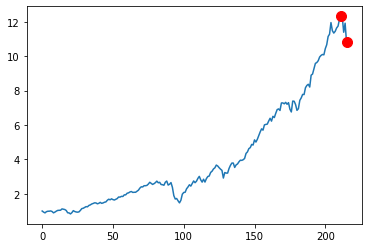

-0.12230760273017212
./Results/Unlagged/GradientBoost_mean_probability_linear_returns.csv


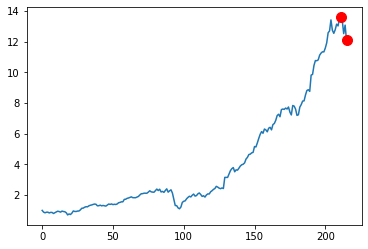

-0.11146357350805289
./Results/Unlagged/RandomForest_mean_no_rule_linear_returns.csv


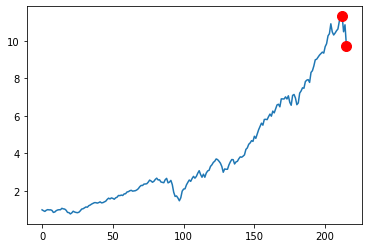

-0.13906374523102796
./Results/Unlagged/RandomForest_mean_probability_linear_returns.csv


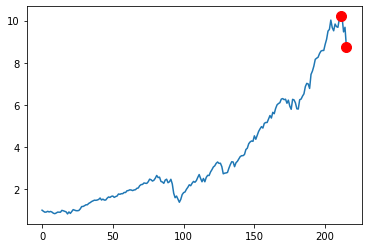

-0.14344117728484598
./Results/Unlagged/AdaBoost_dollar_neutral_refreshed_no_rule_linear_returns.csv


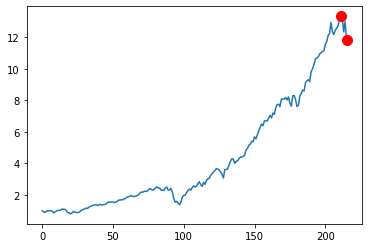

-0.11449322133461487
./Results/Unlagged/AdaBoost_dollar_neutral_refreshed_probability_linear_returns.csv


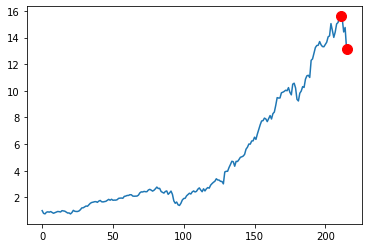

-0.1554077395411754
./Results/Unlagged/GradientBoost_dollar_neutral_refreshed_no_rule_linear_returns.csv


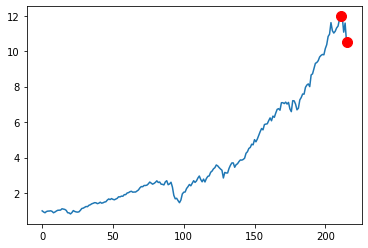

-0.12176269629866711
./Results/Unlagged/GradientBoost_dollar_neutral_refreshed_probability_linear_returns.csv


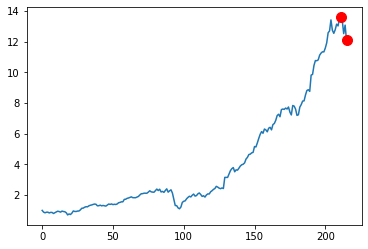

-0.11146357350805289
./Results/Unlagged/RandomForest_dollar_neutral_refreshed_no_rule_linear_returns.csv


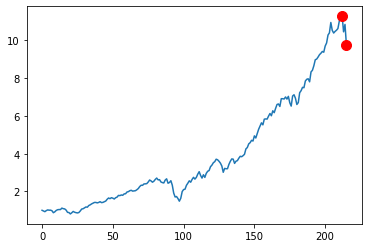

-0.13413804382597502
./Results/Unlagged/RandomForest_dollar_neutral_refreshed_probability_linear_returns.csv


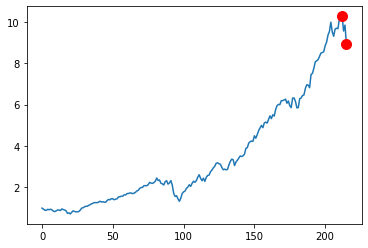

-0.12952561262504203
./Results/Unlagged/AdaBoost_market_cap_no_rule_linear_returns.csv


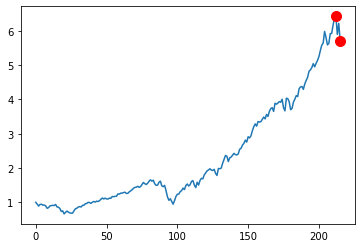

-0.1107238779046796
./Results/Unlagged/AdaBoost_market_cap_probability_linear_returns.csv


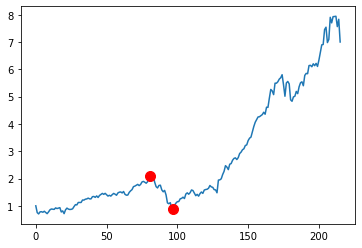

-0.5674919200401822
./Results/Unlagged/GradientBoost_market_cap_no_rule_linear_returns.csv


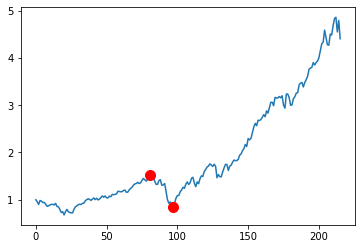

-0.44415414052758845
./Results/Unlagged/GradientBoost_market_cap_probability_linear_returns.csv


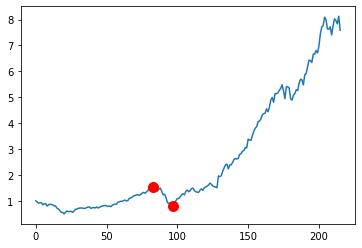

-0.4875365043962803
./Results/Unlagged/RandomForest_market_cap_no_rule_linear_returns.csv


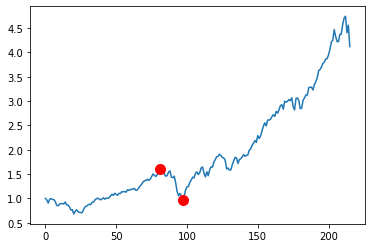

-0.40009696095685654
./Results/Unlagged/RandomForest_market_cap_probability_linear_returns.csv


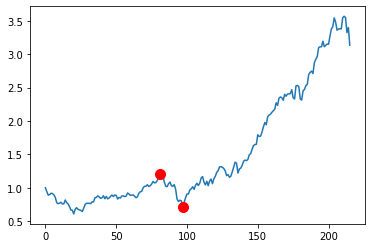

-0.40740345137596856
./Results/Unlagged/AdaBoost_mean_no_rule_trend_returns.csv


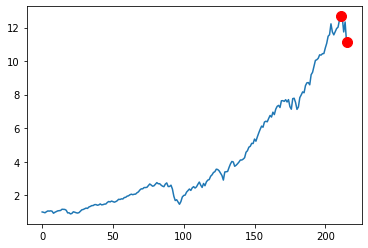

-0.12186311710882061
./Results/Unlagged/AdaBoost_mean_probability_trend_returns.csv


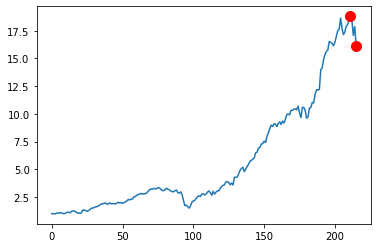

-0.1438463792466742
./Results/Unlagged/GradientBoost_mean_no_rule_trend_returns.csv


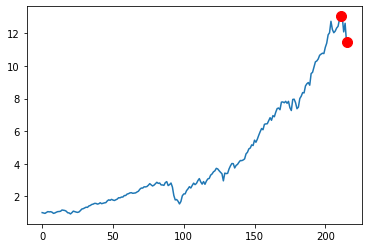

-0.1232521815316085
./Results/Unlagged/GradientBoost_mean_probability_trend_returns.csv


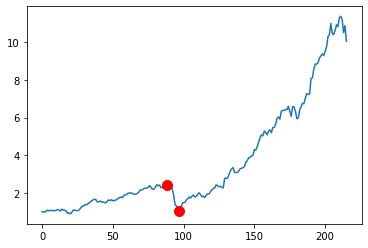

-0.5694859586109663
./Results/Unlagged/RandomForest_mean_no_rule_trend_returns.csv


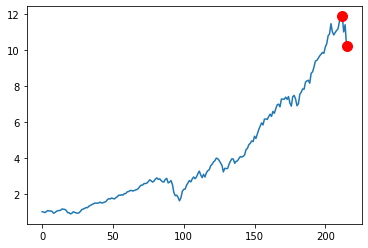

-0.1393601193579573
./Results/Unlagged/RandomForest_mean_probability_trend_returns.csv


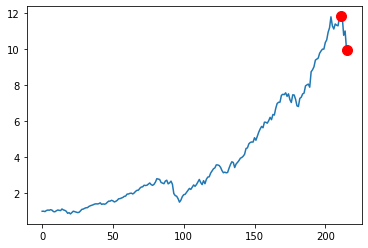

-0.15685150835633174
./Results/Unlagged/AdaBoost_dollar_neutral_refreshed_no_rule_trend_returns.csv


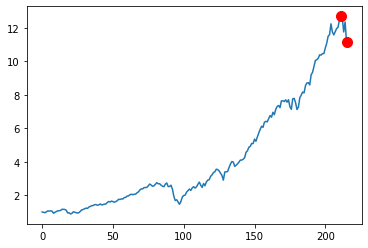

-0.12186311710882061
./Results/Unlagged/AdaBoost_dollar_neutral_refreshed_probability_trend_returns.csv


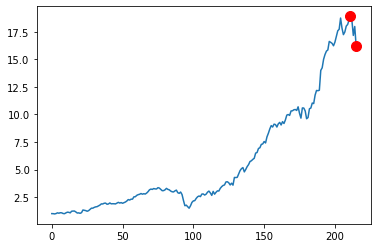

-0.14384637924667437
./Results/Unlagged/GradientBoost_dollar_neutral_refreshed_no_rule_trend_returns.csv


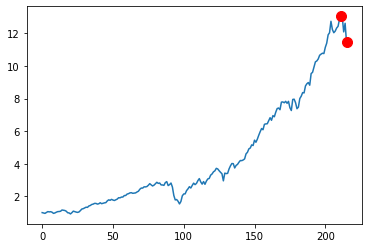

-0.1232521815316086
./Results/Unlagged/GradientBoost_dollar_neutral_refreshed_probability_trend_returns.csv


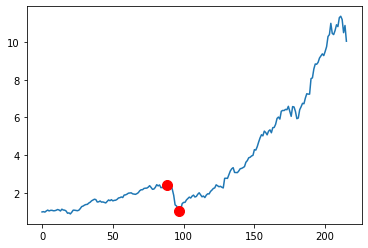

-0.5694859586109664
./Results/Unlagged/RandomForest_dollar_neutral_refreshed_no_rule_trend_returns.csv


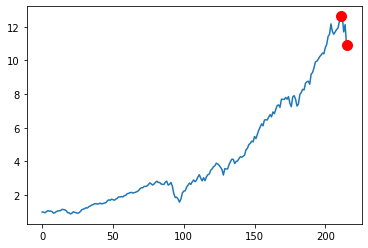

-0.1356640769793232
./Results/Unlagged/RandomForest_dollar_neutral_refreshed_probability_trend_returns.csv


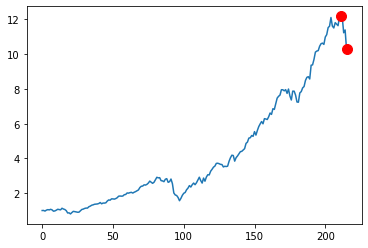

-0.15560428632290707
./Results/Unlagged/AdaBoost_market_cap_no_rule_trend_returns.csv


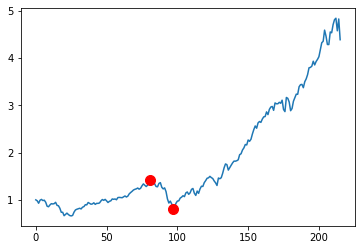

-0.4287623661805457
./Results/Unlagged/AdaBoost_market_cap_probability_trend_returns.csv


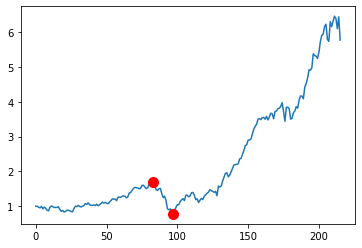

-0.5416969200087879
./Results/Unlagged/GradientBoost_market_cap_no_rule_trend_returns.csv


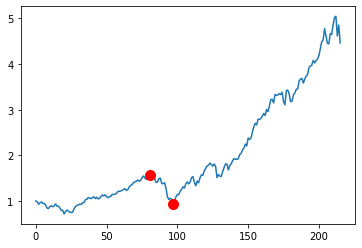

-0.41255495837489387
./Results/Unlagged/GradientBoost_market_cap_probability_trend_returns.csv


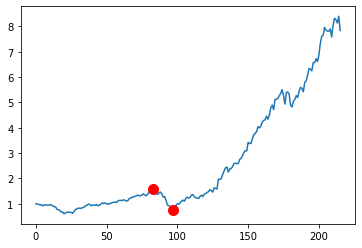

-0.5287751227826117
./Results/Unlagged/RandomForest_market_cap_no_rule_trend_returns.csv


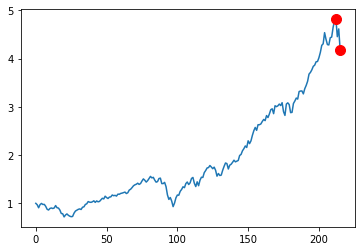

-0.13377176366412344
./Results/Unlagged/RandomForest_market_cap_probability_trend_returns.csv


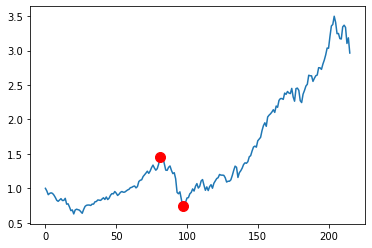

-0.4925761704086521


In [209]:
algos = ['AdaBoost','GradientBoost','RandomForest']
valuation = ['mean','dollar_neutral_refreshed','market_cap']
interpolation = ['linear','trend']
filterStocks = ['no_rule','probability']
tr_cost = [True,False]
for tr in tr_cost:
    for interp in interpolation:
        for val in valuation:
            #adaboost
            try:
                f_a_n = './Results/Unlagged/AdaBoost_' + val+'_no_rule_' + str(tr) + '_' + interp + '_returns.csv'
                a_n = pd.read_csv(f_a_n,index_col=0)['Long_Only']
            except:
                f_a_n = './Results/Unlagged/AdaBoost_' + val+'_no_rule_' + interp + '_returns.csv'
                a_n = pd.read_csv(f_a_n,index_col=0)['Long_Only']
            print(f_a_n)
            print(maximum_drawdown(a_n))
            try:
                f_a_p = './Results/Unlagged/AdaBoost_' + val+'_probability_' + str(tr) + '_' + interp + '_returns.csv'
                a_p = pd.read_csv(f_a_p,index_col=0)['Long_Only']
            except:
                f_a_p = './Results/Unlagged/AdaBoost_' + val+'_probability_' + interp + '_returns.csv'
                a_p = pd.read_csv(f_a_p,index_col=0)['Long_Only']
            print(f_a_p)
            print(maximum_drawdown(a_p))
            #gradientboost
            try:
                f_g_n = './Results/Unlagged/GradientBoost_' + val+'_no_rule_' + str(tr) + '_' + interp + '_returns.csv'
                g_n = pd.read_csv(f_g_n,index_col=0)['Long_Only']
            except:
                f_g_n = './Results/Unlagged/GradientBoost_' + val+'_no_rule_' + interp + '_returns.csv'
                g_n = pd.read_csv(f_g_n,index_col=0)['Long_Only']
            print(f_g_n)
            print(maximum_drawdown(g_n)) 
            try:
                f_g_p = './Results/Unlagged/GradientBoost_' + val+'_probability_' + str(tr) + '_' + interp + '_returns.csv'
                g_p = pd.read_csv(f_g_p,index_col=0)['Long_Only']
            except:
                f_g_p = './Results/Unlagged/GradientBoost_' + val+'_probability_' + interp + '_returns.csv'
                g_p = pd.read_csv(f_g_p,index_col=0)['Long_Only']
            print(f_g_p)
            print(maximum_drawdown(g_p))  
            #randomforest
            try:
                f_r_n = './Results/Unlagged/RandomForest_' + val+'_no_rule_' + str(tr) + '_' + interp + '_returns.csv'
                r_n = pd.read_csv(f_r_n,index_col=0)['Long_Only']
            except:
                f_r_n = './Results/Unlagged/RandomForest_' + val+'_no_rule_' + interp + '_returns.csv'
                r_n = pd.read_csv(f_r_n,index_col=0)['Long_Only']
            print(f_r_n)
            print(maximum_drawdown(r_n))
            try:
                f_r_p = './Results/Unlagged/RandomForest_' + val+'_probability_' + str(tr) + '_' + interp + '_returns.csv'
                r_p = pd.read_csv(f_r_p,index_col=0)['Long_Only']
            except:
                f_r_p = './Results/Unlagged/RandomForest_' + val+'_probability_' + interp + '_returns.csv'
                r_p = pd.read_csv(f_r_p,index_col=0)['Long_Only']
            print(f_r_p)
            print(maximum_drawdown(r_p))

In [238]:
file = './Results/Unlagged/AdaBoost_mean_probability_True_linear_returns.csv'
#print(f_a_n)
max_drawdown(pd.read_csv(file,index_col =0)['Long_Only'])

2007-09-30 2009-01-31 0.5154913905043836


In [240]:
algos = ['AdaBoost','GradientBoost','RandomForest']
valuation = ['mean','dollar_neutral_refreshed','market_cap']
interpolation = ['linear','trend']
filterStocks = ['no_rule','probability']
tr_cost = [True,False]
for tr in tr_cost:
    for interp in interpolation:
        for val in valuation:
            #adaboost
            try:
                f_a_n = './Results/Lagged/AdaBoost_' + val+'_no_rule_' + str(tr) + '_' + interp + '_returns_lagged.csv'
                a_n = pd.read_csv(f_a_n,index_col=0)['Long_Only']
            except:
                f_a_n = './Results/Lagged/AdaBoost_' + val+'_no_rule_' + interp + '_returns_lagged.csv'
                a_n = pd.read_csv(f_a_n,index_col=0)['Long_Only']
            print(f_a_n)
            print(max_drawdown(a_n))
            try:
                f_a_p = './Results/Lagged/AdaBoost_' + val+'_probability_' + str(tr) + '_' + interp + '_returns_lagged.csv'
                a_p = pd.read_csv(f_a_p,index_col=0)['Long_Only']
            except:
                f_a_p = './Results/Lagged/AdaBoost_' + val+'_probability_' + interp + '_returns_lagged.csv'
                a_p = pd.read_csv(f_a_p,index_col=0)['Long_Only']
            print(f_a_p)
            print(max_drawdown(a_p))
            #gradientboost
            try:
                f_g_n = './Results/Lagged/GradientBoost_' + val+'_no_rule_' + str(tr) + '_' + interp + '_returns_lagged.csv'
                g_n = pd.read_csv(f_g_n,index_col=0)['Long_Only']
            except:
                f_g_n = './Results/Lagged/GradientBoost_' + val+'_no_rule_' + interp + '_returns_lagged.csv'
                g_n = pd.read_csv(f_g_n,index_col=0)['Long_Only']
            print(f_g_n)
            print(max_drawdown(g_n)) 
            try:
                f_g_p = './Results/Lagged/GradientBoost_' + val+'_probability_' + str(tr) + '_' + interp + '_returns_lagged.csv'
                g_p = pd.read_csv(f_g_p,index_col=0)['Long_Only']
            except:
                f_g_p = './Results/Lagged/GradientBoost_' + val+'_probability_' + interp + '_returns_lagged.csv'
                g_p = pd.read_csv(f_g_p,index_col=0)['Long_Only']
            print(f_g_p)
            print(max_drawdown(g_p))  
            #randomforest
            try:
                f_r_n = './Results/Lagged/RandomForest_' + val+'_no_rule_' + str(tr) + '_' + interp + '_returns_lagged.csv'
                r_n = pd.read_csv(f_r_n,index_col=0)['Long_Only']
            except:
                f_r_n = './Results/Lagged/RandomForest_' + val+'_no_rule_' + interp + '_returns_lagged.csv'
                r_n = pd.read_csv(f_r_n,index_col=0)['Long_Only']
            print(f_r_n)
            print(max_drawdown(r_n))
            try:
                f_r_p = './Results/Lagged/RandomForest_' + val+'_probability_' + str(tr) + '_' + interp + '_returns_lagged.csv'
                r_p = pd.read_csv(f_r_p,index_col=0)['Long_Only']
            except:
                f_r_p = './Results/Lagged/RandomForest_' + val+'_probability_' + interp + '_returns_lagged.csv'
                r_p = pd.read_csv(f_r_p,index_col=0)['Long_Only']
            print(f_r_p)
            print(max_drawdown(r_p))

./Results/Lagged/AdaBoost_mean_no_rule_True_linear_returns_lagged.csv
2007-06-30 2008-10-31 0.4905260154708459
None
./Results/Lagged/AdaBoost_mean_probability_True_linear_returns_lagged.csv
2007-08-31 2008-10-31 0.4781673955464854
None
./Results/Lagged/GradientBoost_mean_no_rule_True_linear_returns_lagged.csv
2007-06-30 2008-10-31 0.47540935778315
None
./Results/Lagged/GradientBoost_mean_probability_True_linear_returns_lagged.csv
2008-01-31 2008-10-31 0.4336063648347419
None
./Results/Lagged/RandomForest_mean_no_rule_True_linear_returns_lagged.csv
2007-06-30 2008-10-31 0.47179212033113693
None
./Results/Lagged/RandomForest_mean_probability_True_linear_returns_lagged.csv
2007-06-30 2008-10-31 0.3964177646565638
None
./Results/Lagged/AdaBoost_dollar_neutral_refreshed_no_rule_True_linear_returns_lagged.csv
2007-06-30 2008-10-31 0.49052601547084573
None
./Results/Lagged/AdaBoost_dollar_neutral_refreshed_probability_True_linear_returns_lagged.csv
2007-08-31 2008-10-31 0.4781673955464854
Non

In [13]:
import pandas as pd
import numpy as np
import pandas_datareader.data as data
sp100 = data.DataReader('OEF', 'yahoo', pd.to_datetime('20000101', format='%Y%m%d'), pd.to_datetime('20181130', format='%Y%m%d')).resample('BM').last()
ret_sp100 = sp100['Adj Close'].pct_change().shift(-1)
sp500 = data.DataReader('^GSPC', 'yahoo', pd.to_datetime('20000101', format='%Y%m%d'), pd.to_datetime('20181130', format='%Y%m%d')).resample('BM').last()
ret_sp500 = sp500['Adj Close'].pct_change().shift(-1)

In [23]:
max_drawdown(pd.Series(ret_sp100.dropna()))

2007-09-28 00:00:00 2009-01-30 00:00:00 0.5011612857053619


In [24]:
max_drawdown(pd.Series(ret_sp500.dropna()))

2007-09-28 00:00:00 2009-01-30 00:00:00 0.5255585947031325
